In [52]:
import numpy as np 
import pandas as pd 
import seaborn as sns
import matplotlib.pyplot as plt 

from statsmodels.tsa.stattools import adfuller
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.tsa.arima.model import ARIMA

In [38]:
import sys
import os
sys.path.append(os.path.abspath(os.path.join(os.getcwd(), '../scripts')))

In [39]:
data_frame = pd.read_csv('../data/raw/BrentOilPrices.csv')

In [40]:
data_frame.head(10)

,Date,Price
0,20-May-87,18.63
1,21-May-87,18.45
2,22-May-87,18.55
3,25-May-87,18.60
4,26-May-87,18.63
5,27-May-87,18.60
6,28-May-87,18.60
7,29-May-87,18.58
8,01-Jun-87,18.65
9,02-Jun-87,18.68


# Understanding the data

In [41]:
data_frame.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9011 entries, 0 to 9010
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Date    9011 non-null   object 
 1   Price   9011 non-null   float64
dtypes: float64(1), object(1)
memory usage: 140.9+ KB


In [42]:
data_frame.shape

(9011, 2)

In [43]:
data_frame.describe()

,Price
count,9011.000000
mean,48.420782
std,32.860110
min,9.100000
25%,19.050000
50%,38.570000
75%,70.090000
max,143.950000


In [44]:
from analysis import *

In [45]:
data_frame.reset_index(inplace=True)

In [46]:
column_summary(data_frame)

,col_name,col_dtype,num_of_nulls,num_of_non_nulls,num_of_distinct_values,distinct_values_counts
0,index,int64,0,9011,9011,"{9010: 1, 0: 1, 1: 1, 8994: 1, 8993: 1, 8992: ..."
1,Date,object,0,9011,9011,"{'Nov 14, 2022': 1, '20-May-87': 1, '21-May-87..."
2,Price,float64,0,9011,5015,"{18.48: 26, 18.15: 22, 16.85: 20, 17.0: 18, 18..."


In [37]:
# convert the data into a pandas dataframe

data_frame['Date'] = pd.to_datetime(data_frame['Date'], format="%Y-%m-%d")


In [36]:
# Sample DataFrame
data_frame = pd.DataFrame({'Date': ['2024-02-25', '2023-11-15', '2022-08-05']})

# Convert 'Date' column to datetime format
data_frame['Date'] = pd.to_datetime(data_frame['Date'], errors='coerce')

# Extract Year, Month, and Day
data_frame['Year'] = data_frame['Date'].dt.year
data_frame['Month'] = data_frame['Date'].dt.month
data_frame['Day'] = data_frame['Date'].dt.day

print(data_frame)

        Date  Year  Month  Day
0 2024-02-25  2024      2   25
1 2023-11-15  2023     11   15
2 2022-08-05  2022      8    5


In [47]:
print(data_frame.columns)


Index(['index', 'Date', 'Price'], dtype='object')


# outliers

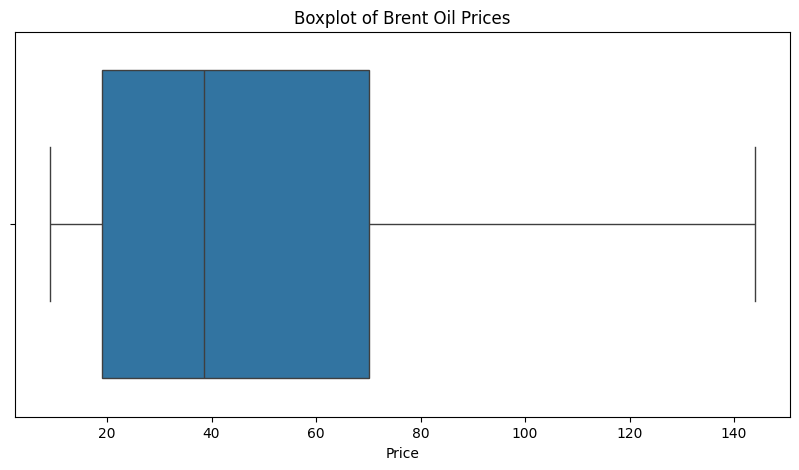

In [48]:
plt.figure(figsize=(10, 5))
sns.boxplot(x=data_frame['Price'])  # Use data_frame instead of df
plt.title('Boxplot of Brent Oil Prices')
plt.show()

# Histogram: Distribution of oil prices

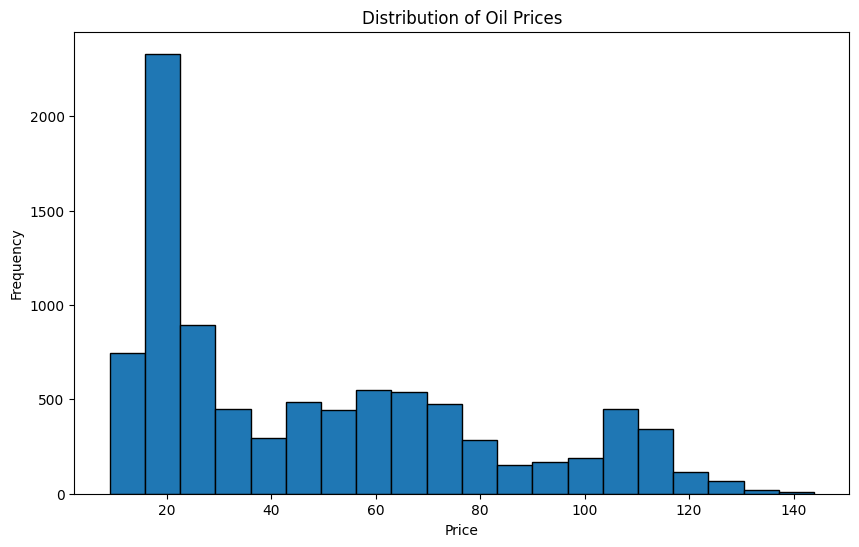

In [49]:
plt.figure(figsize=(10, 6))
plt.hist(df['Price'], bins=20, edgecolor='black')
plt.title('Distribution of Oil Prices')
plt.xlabel('Price')
plt.ylabel('Frequency')
plt.show()

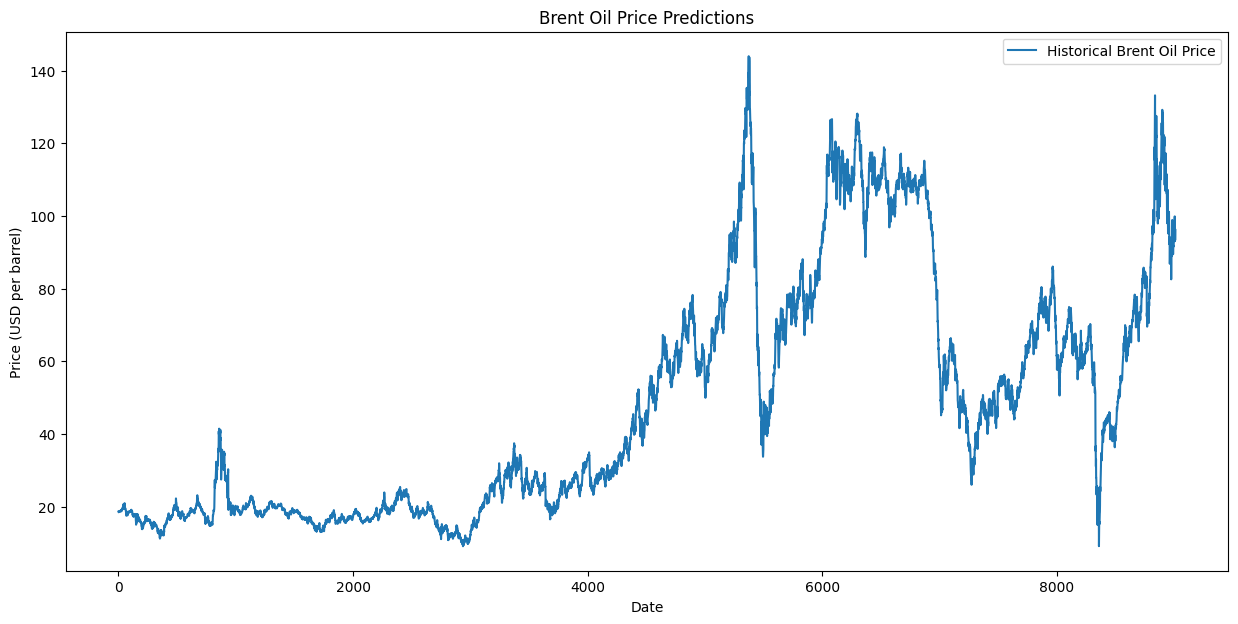

In [56]:
plt.figure(figsize=(15, 7))
plt.plot(data_frame['Price'], label='Historical Brent Oil Price')
plt.xlabel('Date')
plt.ylabel('Price (USD per barrel)')
plt.title('Brent Oil Price Predictions')
plt.legend()
plt.show()